In [178]:
!pip install seaborn

## State of the art (ROAD, sort base ranking and linear noisy imputation notrain method)

In [179]:
noretrain_linear = "/workspaces/outputs/road/sota/results/noretrain.json"
noretrain_fixed = "/workspaces/outputs/road/sort_fixed/results/noretrain.json"
noretrain_telea = "/workspaces/outputs/road/sort_telea/results/noretrain.json"
noretrain_ns = "/workspaces/outputs/road/sort_ns/results/noretrain.json"

notretrain_threshold_linear = "/workspaces/outputs/road/threshold_linear/results/noretrain.json"

notretrain_threshold_fixed = "/workspaces/outputs/road/threshold_fixd/results/noretrain.json"

notretrain_threshold_telea = "/workspaces/outputs/road/threshold_telea/results/noretrain.json"
notretrain_threshold_ns = "/workspaces/outputs/road/threshold_ns/results/noretrain.json"


In [180]:
import json
import pandas as pd
import numpy as np

In [181]:
with open(noretrain_linear) as json_file:
    noretrain_linear = json.load(json_file)


In [182]:
with open(noretrain_fixed) as json_file:
    noretrain_fixed = json.load(json_file)

In [183]:
with open(noretrain_telea) as json_file:
    noretrain_telea = json.load(json_file)



In [184]:
with open(notretrain_threshold_linear) as json_file:
    notretrain_threshold_linear = json.load(json_file)

In [185]:
with open(noretrain_ns) as json_file:
    noretrain_ns = json.load(json_file)

In [186]:
with open(notretrain_threshold_fixed) as json_file:
    notretrain_threshold_fixed = json.load(json_file)


In [187]:
with open(notretrain_threshold_telea) as json_file:
    notretrain_threshold_telea = json.load(json_file)

In [188]:
with open(notretrain_threshold_ns) as json_file:
    notretrain_threshold_ns = json.load(json_file)

In [189]:
def averaging_accuracy(dict_result):
    import copy
    
    dictionary = copy.deepcopy(dict_result)
    for method in dictionary['imputations']:
        for key_m, value_m in dictionary[method].items():
            for key_sb, value_ac in value_m.items():
                for key_f, value_f in  value_ac.items():                  
                    for key_p, value_ar in value_f.items():
                        value_f[key_p] = sum(value_ar)/len(value_ar)
    return dictionary

In [190]:
def plot_consistancy( data_dict, appraoch="linear", morf=True, path=None):
    import seaborn as sns
    import copy
    if morf:
        method = 'MoRF'
    else:
        method ='LeRF'
    printable_data_dict = copy.deepcopy(data_dict)
    new_dict = {}
    new_dict['x_axis'] = printable_data_dict["percentages"]
    for key_m,  val_m in printable_data_dict[appraoch].items():
        for key_var, val_var in val_m.items():
            if not morf:
                accs = val_var['lerf']
                l = list(accs.values())
                #l.reverse()
                new_dict[f"{key_m}-{key_var}"] = l
            else:
                accs = val_var['morf']
                new_dict[f"{key_m}-{key_var}"] = list(accs.values())
                 

    import seaborn as sns
    sns.set_theme(style="whitegrid")

    data = pd.DataFrame.from_dict(new_dict)
    data = data.set_index('x_axis')

    ax = sns.lineplot(data=data, palette="tab10", linewidth=2.5)
    ax.set(ylim=(0.1, 1))
    ax.set(xlim=(0.1, 1))
    ax.set(xlabel=f'% romoved {method}', ylabel='Accuracy')
    ax.figure.savefig(f'{path}/{appraoch}-{method}.png')
    ax.figure.clf()
   

from scipy.stats import spearmanr
def calculate_sperman_rank(accuracy_result, method = "telea", morf=True):
    ranking = {}
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
            if morf:
                res = np.array(list(val_var["morf"].values()))
                per = list(val_var["morf"].keys())
                per = 1 - np.array([float(x) for x in per])
            else:
                res =  list(val_var["lerf"].values())
                #res.reverse()
                res = 1 - np.array(res)
                per = list(val_var["lerf"].keys())
                
                per = [float(x) for x in per]
                
            score = spearmanr(per, res).correlation
            ranking[f"{key_m}-{key_var}"] = score
    ranking = {k: v for k, v in sorted(ranking.items(),  key=lambda item: item[1])}
    
    return ranking



In [191]:
def calculate_spearman_morf_lerf(accuracy_result, method = "telea"):
    scores =[]
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
                morf = list(val_var["morf"].values())
                lerf =  list(val_var["lerf"].values())
                #lerf.reverse()
                score = spearmanr(morf, lerf).correlation
                scores.append(score)
    return scores


In [192]:
def calculate_correlation(accuracy_result, method= "telea"):
    scores = {}
    from scipy.stats.stats import pearsonr   
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
                morf = list(val_var["morf"].values())
                lerf =  list(val_var["lerf"].values())
                #lerf.reverse()
                #lerf = 1 - np.array(lerf)
                scores[key_var] = pearsonr(morf,lerf)

    return scores

In [193]:
def show_images(path):
    from PIL import Image
    import glob
    images = glob.glob(f'{path}/*.png')
    for im in images:
        im = Image.open(im)
        display(im)



In [194]:
averaged_accuarcy_linear = averaging_accuracy(noretrain_linear)
averaged_accuarcy_fixed = averaging_accuracy(noretrain_fixed)
averaged_accuarcy_telea = averaging_accuracy(noretrain_telea)
averaged_accuracy_ns =  averaging_accuracy(noretrain_ns)

averaged_accuracy_threshold_linear = averaging_accuracy(notretrain_threshold_linear)
averaged_accuracy_threshold_fixed = averaging_accuracy(notretrain_threshold_fixed)
averaged_accuracy_threshold_telea = averaging_accuracy(notretrain_threshold_telea)
averaged_accuracy_threshold_ns = averaging_accuracy(notretrain_threshold_ns)

## Liner fixed

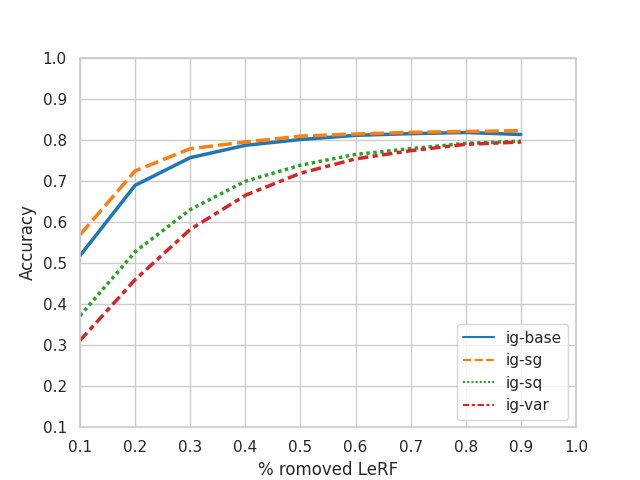

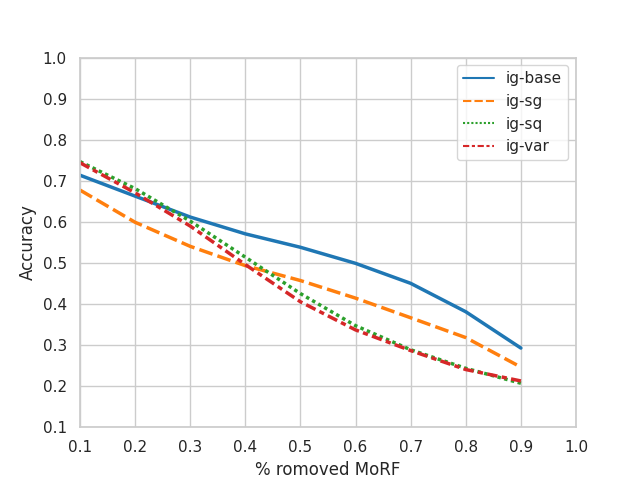

<Figure size 640x480 with 0 Axes>

In [195]:
plot_consistancy(averaged_accuarcy_fixed, morf=True, appraoch="fixed", path=f'/workspaces/outputs/road/sort_fixed/plots')
plot_consistancy(averaged_accuarcy_fixed, morf=False, appraoch="fixed", path=f'/workspaces/outputs/road/sort_fixed/plots')
show_images("/workspaces/outputs/road/sota/plots")

In [196]:
ranking = calculate_sperman_rank(averaged_accuarcy_fixed, method='fixed', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuarcy_fixed, method='fixed', morf=True)
print(ranking)

{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0}
{'ig-sg': 0.9833333333333333, 'ig-base': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [197]:
scores = calculate_spearman_morf_lerf(averaged_accuarcy_fixed, method='fixed')
scores

[-1.0, -0.9833333333333333, -1.0, -1.0]

## SOTA (Sorted linear)

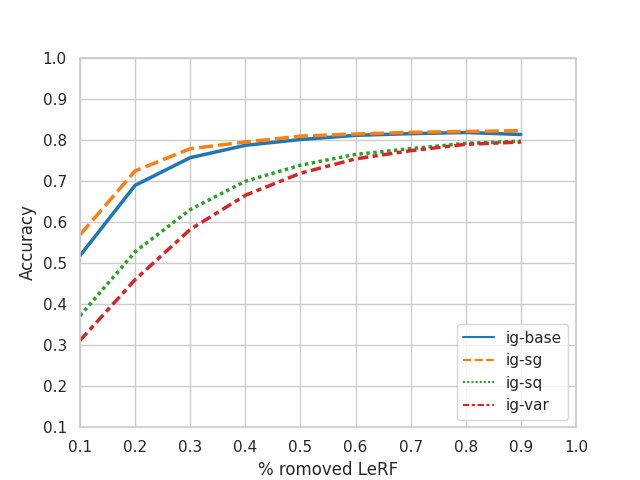

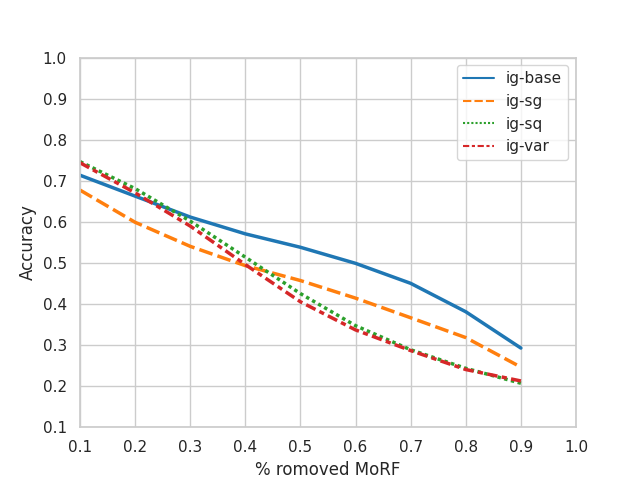

<Figure size 640x480 with 0 Axes>

In [198]:
plot_consistancy(averaged_accuarcy_linear, morf=True, appraoch="linear", path=f'/workspaces/outputs/road/sota/plots')
plot_consistancy(averaged_accuarcy_linear, morf=False, appraoch="linear", path=f'/workspaces/outputs/road/sota/plots')
show_images("/workspaces/outputs/road/sota/plots")

In [219]:
ranking = calculate_sperman_rank(averaged_accuarcy_linear, method='linear', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuarcy_linear, method='linear', morf=True)
print(ranking)

{'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0, 'ig-base': -0.9500000000000001}
{'ig-base': 1.0, 'ig-sg': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [220]:
scores = calculate_spearman_morf_lerf(averaged_accuarcy_linear, method='linear')
scores

[-0.9500000000000001, -1.0, -1.0, -1.0]

## Sort telea


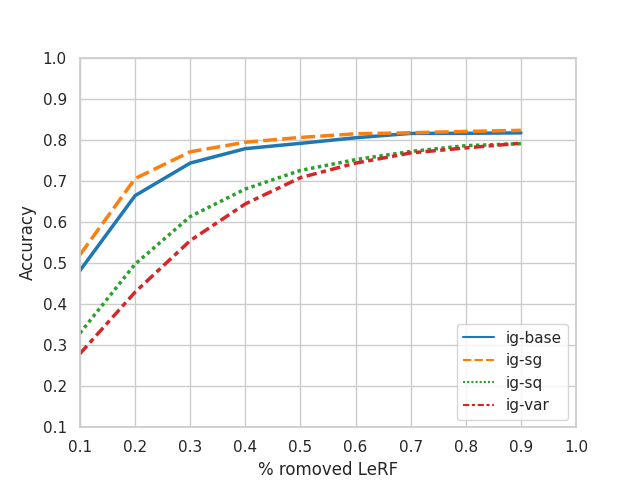

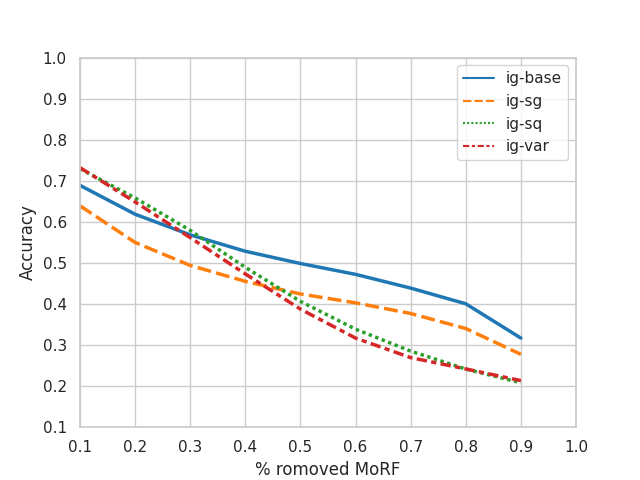

<Figure size 640x480 with 0 Axes>

In [222]:
plot_consistancy(averaged_accuarcy_telea, appraoch='telea', morf=False, path=f'/workspaces/outputs/road/sort_telea/plots')

plot_consistancy(averaged_accuarcy_telea, appraoch='telea', morf=True, path=f'/workspaces/outputs/road/sort_telea/plots')

show_images('/workspaces/outputs/road/sort_telea/plots')

In [223]:
ranking = calculate_sperman_rank(averaged_accuarcy_telea, method='telea', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuarcy_telea, method='telea', morf=True)
print(ranking)

{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0}
{'ig-base': 1.0, 'ig-sg': 1.0, 'ig-sq': 1.0, 'ig-var': 1.0}


In [224]:
scores = calculate_spearman_morf_lerf(averaged_accuarcy_telea, method='telea')

print(scores)

[-1.0, -1.0, -1.0, -1.0]


## Sort NS

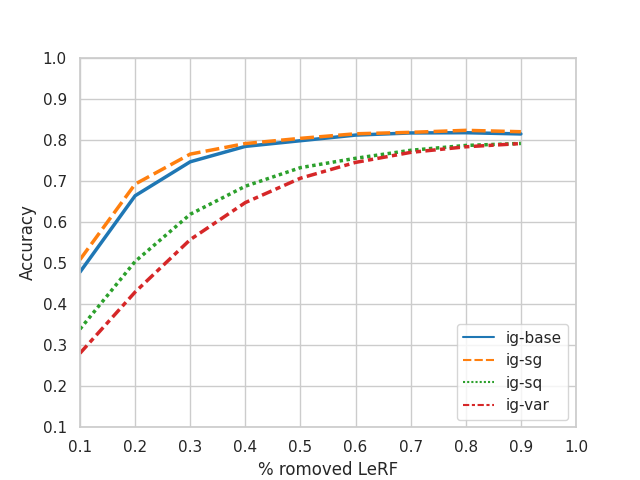

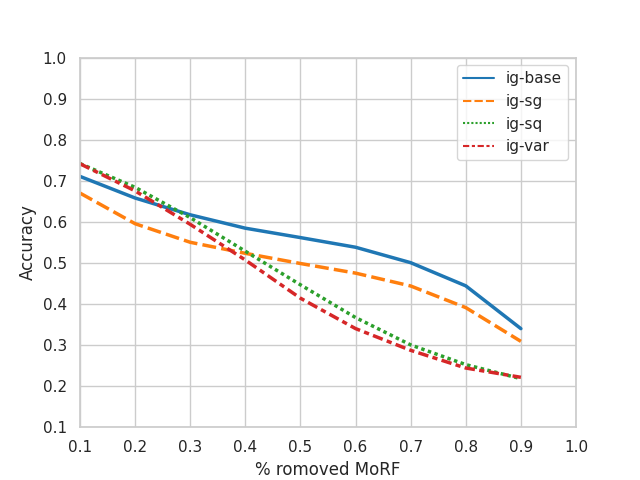

<Figure size 640x480 with 0 Axes>

In [204]:
plot_consistancy(averaged_accuracy_ns, morf=False, appraoch="ns", path=f'/workspaces/outputs/road/sort_ns/plots')
plot_consistancy(averaged_accuracy_ns, morf=True, appraoch="ns", path=f'/workspaces/outputs/road/sort_ns/plots')
show_images('/workspaces/outputs/road/sort_ns/plots')

## Threshold (Linear)

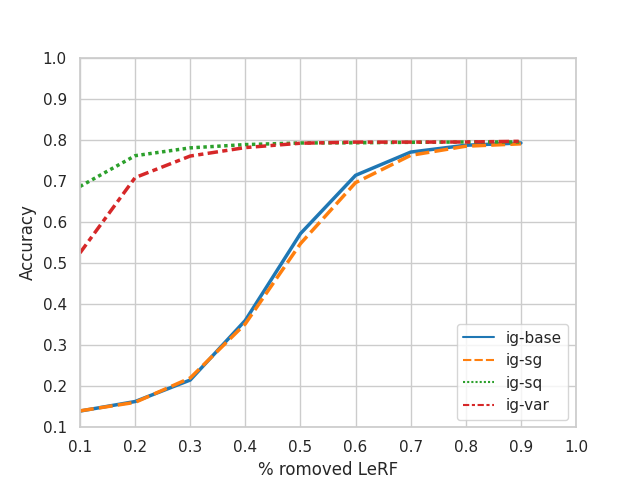

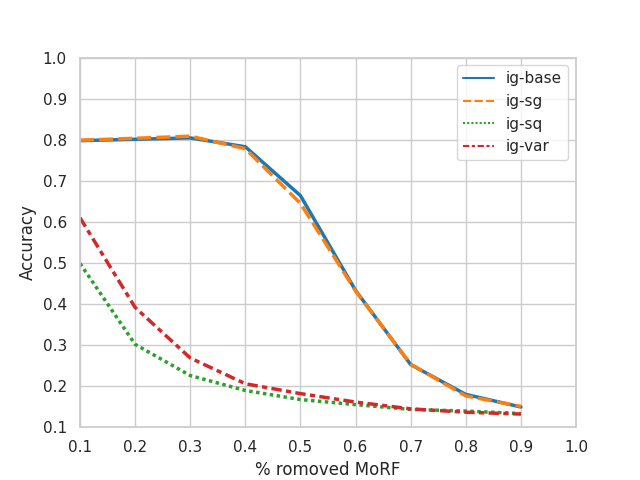

<Figure size 640x480 with 0 Axes>

In [205]:
plot_consistancy(averaged_accuracy_threshold_linear, morf=False, appraoch="linear", path=f'/workspaces/outputs/road/threshold_linear/plots')
plot_consistancy(averaged_accuracy_threshold_linear, morf=True, appraoch="linear", path=f'/workspaces/outputs/road/threshold_linear/plots')
show_images(f'/workspaces/outputs/road/threshold_linear/plots')

In [206]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_linear, method='linear', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_linear, method='linear', morf=True)
print(ranking)

{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -0.9958246164193105}
{'ig-base': 0.9333333333333332, 'ig-sg': 0.9333333333333332, 'ig-sq': 1.0, 'ig-var': 1.0}


In [207]:
scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_linear, method='linear')
print(scores)


[-0.9333333333333332, -0.9333333333333332, -1.0, -0.9958246164193105]


## Threshold (fixed)

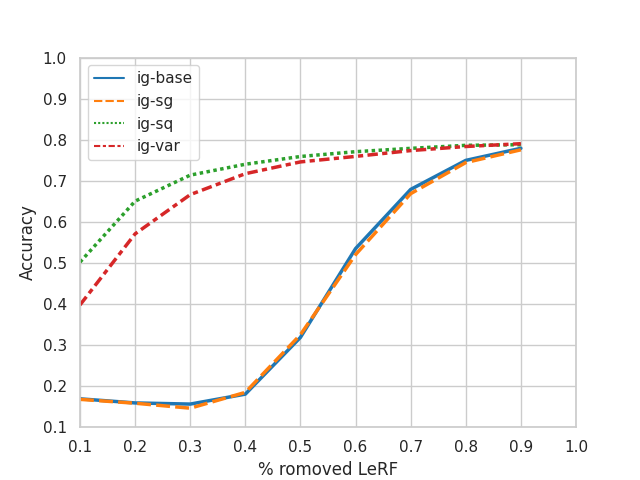

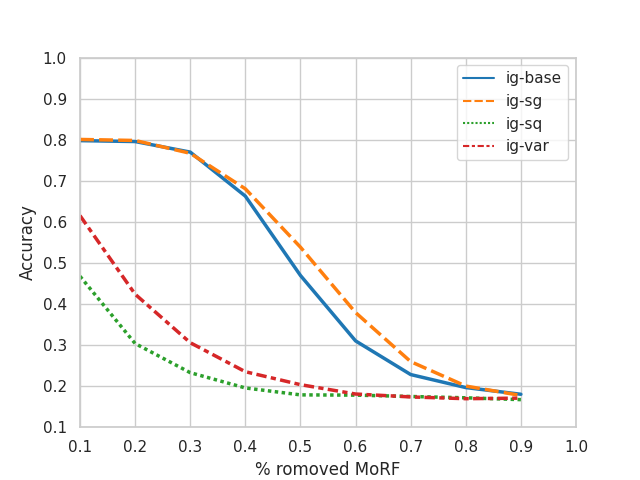

<Figure size 640x480 with 0 Axes>

In [208]:
plot_consistancy(averaged_accuracy_threshold_fixed, morf=False, appraoch="fixed", path=f'/workspaces/outputs/road/threshold_fixd/plots')
plot_consistancy(averaged_accuracy_threshold_fixed, morf=True, appraoch="fixed", path=f'/workspaces/outputs/road/threshold_fixd/plots')
show_images('/workspaces/outputs/road/threshold_fixd/plots')

## Threshold (telea)

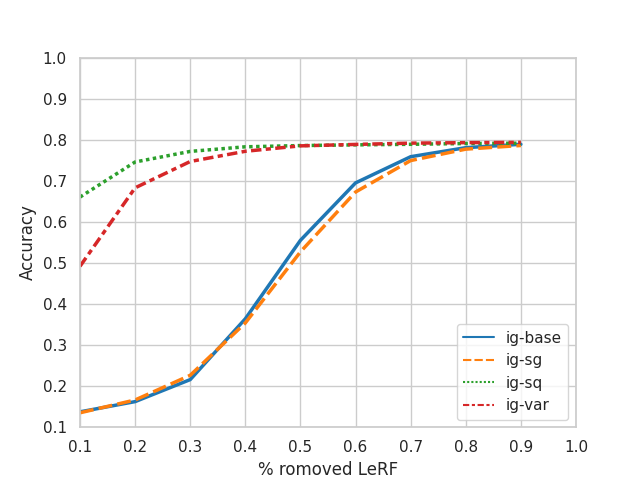

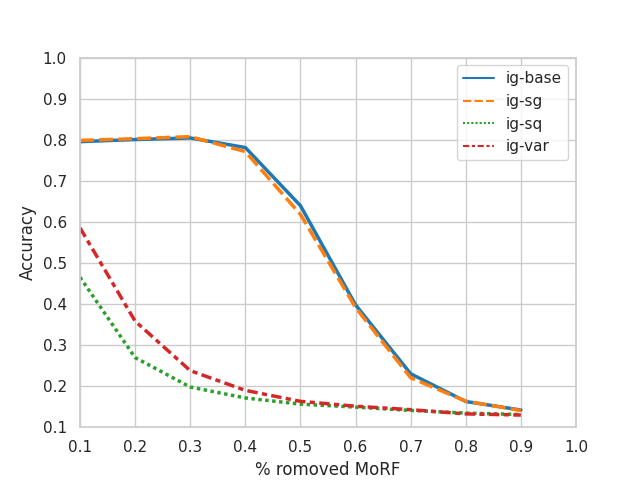

<Figure size 640x480 with 0 Axes>

In [209]:
plot_consistancy(averaged_accuracy_threshold_telea, morf=False, appraoch="telea", path=f'/workspaces/outputs/road/threshold_telea/plots')
plot_consistancy(averaged_accuracy_threshold_telea, morf=True, appraoch="telea", path=f'/workspaces/outputs/road/threshold_telea/plots')
show_images('/workspaces/outputs/road/threshold_telea/plots')

In [210]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_telea, method='telea', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_telea, method='telea', morf=True)
print(ranking)


{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0}
{'ig-base': 0.9333333333333332, 'ig-sg': 0.9333333333333332, 'ig-sq': 1.0, 'ig-var': 1.0}


In [211]:

scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_telea, method='telea')
print("Spearman rank:", scores)

Spearman rank: [-0.9333333333333332, -0.9333333333333332, -1.0, -1.0]


## Threshold (NS)

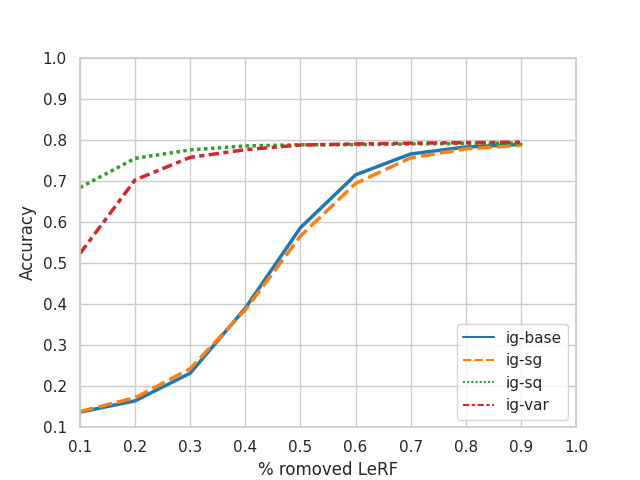

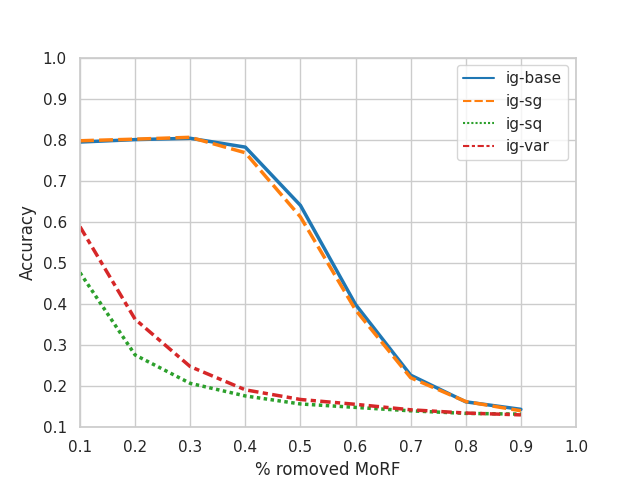

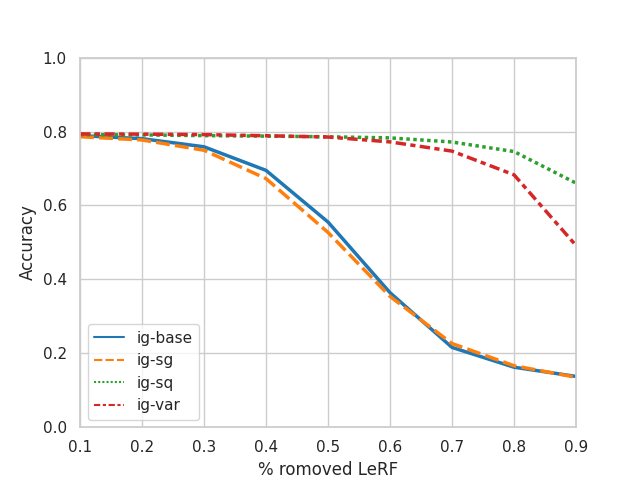

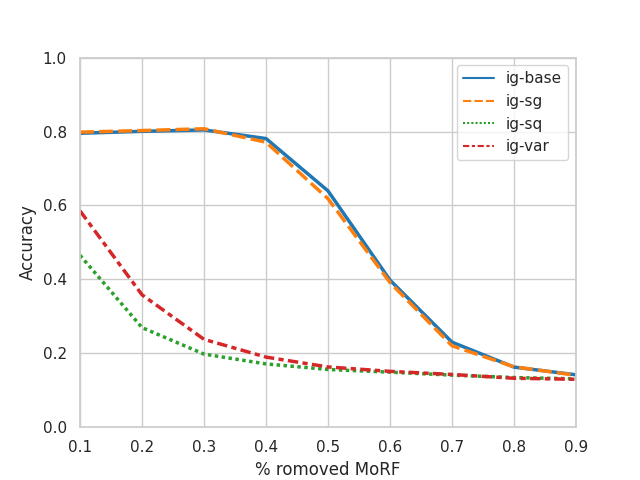

<Figure size 640x480 with 0 Axes>

In [212]:
plot_consistancy(averaged_accuracy_threshold_ns, morf=False, appraoch="ns", path=f'/workspaces/outputs/road/threshold_ns/plots')
plot_consistancy(averaged_accuracy_threshold_ns, morf=True, appraoch="ns", path=f'/workspaces/outputs/road/threshold_ns/plots')
show_images('/workspaces/outputs/road/threshold_ns/plots')

In [213]:
ranking = calculate_sperman_rank(averaged_accuracy_threshold_ns, method='ns', morf=False)
print(ranking)
ranking = calculate_sperman_rank(averaged_accuracy_threshold_ns, method='ns', morf=True)
print(ranking)


{'ig-base': -1.0, 'ig-sg': -1.0, 'ig-sq': -1.0, 'ig-var': -1.0}
{'ig-base': 0.9333333333333332, 'ig-sg': 0.9333333333333332, 'ig-sq': 1.0, 'ig-var': 1.0}


In [214]:

scores =  calculate_spearman_morf_lerf(averaged_accuracy_threshold_ns, method='ns')
print("Spearman rank:", scores)

Spearman rank: [-0.9333333333333332, -0.9333333333333332, -1.0, -1.0]


## Sort(fixed)


## Coorelation of morf and lerf

## Sorted (fixed)

In [215]:
calculate_correlation(averaged_accuarcy_fixed, method="fixed")

/tmp/ipykernel_3991/2138539284.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=-0.7558503584480741, pvalue=0.018470785684142413),
 'sg': PearsonRResult(statistic=-0.8209807686994819, pvalue=0.006676916563450208),
 'sq': PearsonRResult(statistic=-0.9981921990184124, pvalue=8.256588721195719e-10),
 'var': PearsonRResult(statistic=-0.997164443557726, pvalue=3.986329700689121e-09)}

In [216]:
calculate_correlation(averaged_accuarcy_linear, method="linear")

/tmp/ipykernel_3991/2138539284.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=-0.7536900825670164, pvalue=0.01900538191424471),
 'sg': PearsonRResult(statistic=-0.8123749893581141, pvalue=0.007799330520257625),
 'sq': PearsonRResult(statistic=-0.9276126461057043, pvalue=0.00031288836537117547),
 'var': PearsonRResult(statistic=-0.9573157562094782, pvalue=5.073548521844479e-05)}

In [217]:
calculate_correlation(averaged_accuracy_threshold_linear, method="linear")

/tmp/ipykernel_3991/2138539284.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=-0.9286060610786377, pvalue=0.00029841124141678375),
 'sg': PearsonRResult(statistic=-0.9443678024233921, pvalue=0.0001266053495783783),
 'sq': PearsonRResult(statistic=-0.985544315028904, pvalue=1.1791061540642017e-06),
 'var': PearsonRResult(statistic=-0.9731123013709775, pvalue=1.0222730169151663e-05)}

In [218]:
calculate_correlation(averaged_accuracy_threshold_ns, method="ns")

/tmp/ipykernel_3991/2138539284.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


{'base': PearsonRResult(statistic=-0.9263400032707716, pvalue=0.0003321460841260361),
 'sg': PearsonRResult(statistic=-0.9455815133479021, pvalue=0.00011733988851811001),
 'sq': PearsonRResult(statistic=-0.9950969389628619, pvalue=2.7045844714479748e-08),
 'var': PearsonRResult(statistic=-0.9840856771082567, pvalue=1.6483782290700677e-06)}